In [85]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from costs import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [86]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    w_star = np.linalg.inv(tx.T@tx)@(tx.T)@y
    loss = compute_loss_mse(y,tx,w_star)
    return loss, w_star

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [87]:
from helpers import *
from grid_search import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)

    # Grid search 
    grid_w0, grid_w1 = generate_w(num_intervals=100)
    grid_losses = grid_search(y, tx, grid_w0, grid_w1)
    loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
    
    print("Grid search : loss= {} W={}, {}".format(loss_star,w0_star,w1_star))
    
    # least squares
    loss,w_star = least_squares(y,tx)
    print("least squares : loss= {} W= {}".format(loss,w_star))
    

Test it here

In [88]:
test_your_least_squares()

Grid search : loss= 15.55870336860953 W=72.72727272727272, 13.636363636363626
least squares : loss= 15.385887868829403 W= [73.293922   13.47971243]


## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [89]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [90]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    fn = lambda a: [pow(a, d) for d in range(0, degree + 1)]
    result = map(fn, x)
    return np.asarray(list(result))

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [91]:
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # transform to polynome
        x_poly = build_poly(x,degree)
       
        # Apply least squares method
        loss,weights=least_squares(y,x_poly)
        
        rmse = np.sqrt(2*loss)
        
        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.258582776677375
Processing 3th experiment, degree=7, rmse=0.2496587036090753
Processing 4th experiment, degree=12, rmse=0.9268294526468844


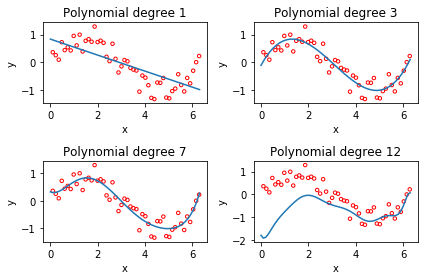

In [92]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [93]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    # shuffle data
    np.random.shuffle(x)
    np.random.shuffle(y)
    
    threshold = int(ratio*x.shape[0])
    
    x_train,y_train = x[:threshold],y[:threshold]
    x_test,y_test = x[threshold:],y[threshold:]
    
    return x_train,y_train,x_test,y_test

Then, test your `split_data` function below.

In [94]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # Split the data
    x_train,y_train,x_test,y_test = split_data(x,y,ratio,seed)
    
    # Build polynomials
    x_train_poly=build_poly(x_train,degree)
    x_test_poly=build_poly(x_test,degree)
    
    # Apply least squares method
    loss_tr,weights_tr=least_squares(y_train,x_train_poly)
    loss_te,weights_te=least_squares(y_test,x_test_poly)
    
    # Compute rmse
    rmse_tr = np.sqrt(2*loss_tr)
    rmse_te = np.sqrt(2*loss_te)
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [105]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.710, Testing RMSE=0.650
proportion=0.9, degree=3, Training RMSE=0.692, Testing RMSE=0.245
proportion=0.9, degree=7, Training RMSE=0.675, Testing RMSE=1.767
proportion=0.9, degree=12, Training RMSE=0.636, Testing RMSE=19.518
proportion=0.5, degree=1, Training RMSE=0.705, Testing RMSE=0.709
proportion=0.5, degree=3, Training RMSE=0.619, Testing RMSE=0.660
proportion=0.5, degree=7, Training RMSE=0.691, Testing RMSE=0.581
proportion=0.5, degree=12, Training RMSE=0.488, Testing RMSE=0.685
proportion=0.1, degree=1, Training RMSE=0.509, Testing RMSE=0.701
proportion=0.1, degree=3, Training RMSE=0.106, Testing RMSE=0.683
proportion=0.1, degree=7, Training RMSE=0.519, Testing RMSE=0.588
proportion=0.1, degree=12, Training RMSE=0.831, Testing RMSE=0.820


# 3 Ridge Regression
Please fill in the function below.

In [96]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    lambda_bis = lambda_/(2*len(y))
    fst_term = np.linalg.inv(tx.T@tx + lambda_bis * np.identity(tx.shape[1]))
    snd_term = tx.T@y
    w_star = fst_term@snd_term
    return w_star

In [106]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
 
    # Split the data
    x_train,y_train,x_test,y_test = split_data(x,y,ratio,seed)
   
    # Build polynomials
    x_train_poly=build_poly(x_train,degree)
    x_test_poly=build_poly(x_test,degree)
    
    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        
        weights_tr=ridge_regression(y_train,x_train_poly,lambda_)
        weights_te=ridge_regression(y_test, x_test_poly,lambda_)
        
        loss_tr = compute_loss_mse(y_train,x_train_poly,weights_tr) + lambda_*np.linalg.norm(weights_tr)**2
        loss_te = compute_loss_mse(y_test,x_test_poly,weights_te) + lambda_*np.linalg.norm(weights_te)**2
        
        rmse_tr.append(np.sqrt(2*loss_tr))
        rmse_te.append(np.sqrt(2*loss_te))
        
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)



proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.466, Testing RMSE=0.641
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.474, Testing RMSE=0.651
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.492, Testing RMSE=0.673
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.531, Testing RMSE=0.722
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.608, Testing RMSE=0.822
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.752, Testing RMSE=1.012
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.989, Testing RMSE=1.339
proportion=0.5, degree=7, lambda=0.003, Training RMSE=1.332, Testing RMSE=1.854
proportion=0.5, degree=7, lambda=0.007, Training RMSE=1.745, Testing RMSE=2.587
proportion=0.5, degree=7, lambda=0.016, Training RMSE=2.091, Testing RMSE=3.486
proportion=0.5, degree=7, lambda=0.037, Training RMSE=2.183, Testing RMSE=4.325
proportion=0.5, degree=7, lambda=0.085, Training RMSE=1.978, Testing RMSE=4.749
proportion=0.5, degree=7, lambda=0.193, 

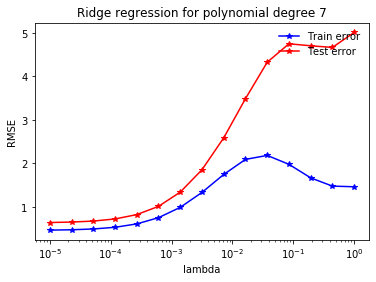

In [116]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)